The provided data contains information about customers, products, and sales transactions.

The data was cleaned and merged to analyze sales by state, age group, and product.

Key insights include:

California had the highest total sales. Customers aged 43 had the highest total sales. The youngest customer was 15, and the oldest was 86. A word cloud visualization shows the most common products purchased.

This fictional sales dataset is useful for practicing data analysis and visualization techniques.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing datasets from csv files.

In [110]:
#Loading data requirement.
customer = pd.read_csv("customer_dim.csv")
product = pd.read_csv("product_dim.csv")
sales = pd.read_csv("sales_transactions.csv")

Inspecting and cleaning the 3 datasets.

In [111]:
#Inspecting the customer data set.
customer.head()

,cust_id,cust_address,cust_age,effective_start_date,effective_end_date,current_ind
0,185057,"335 Meadow St, Los Angeles, CA 90001",15,1900-01-01,9999-12-31,Y
1,225569,"753 Adams St, Portland, ME 04101",15,1900-01-01,9999-12-31,Y
2,134924,"295 Dogwood St, New York City, NY 10001",15,1900-01-01,9999-12-31,Y
3,218931,"40 Jefferson St, Atlanta, GA 30301",15,1900-01-01,9999-12-31,Y
4,140361,"169 Lake St, Boston, MA 02215",15,1900-01-01,9999-12-31,Y


In [112]:
customer.tail()

,cust_id,cust_address,cust_age,effective_start_date,effective_end_date,current_ind
140782,119941,"46 Forest St, Dallas, TX 75001",86,1900-01-01,9999-12-31,Y
140783,174908,"565 Hickory St, San Francisco, CA 94016",86,1900-01-01,9999-12-31,Y
140784,202462,"456 South St, San Francisco, CA 94016",86,1900-01-01,9999-12-31,Y
140785,165763,"246 Johnson St, San Francisco, CA 94016",86,1900-01-01,9999-12-31,Y
140786,147936,"135 Hill St, Seattle, WA 98101",86,1900-01-01,9999-12-31,Y


In [113]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   cust_id               140787 non-null  int64 
 1   cust_address          140787 non-null  object
 2   cust_age              140787 non-null  int64 
 3   effective_start_date  140787 non-null  object
 4   effective_end_date    140787 non-null  object
 5   current_ind           140787 non-null  object
dtypes: int64(2), object(4)
memory usage: 6.4+ MB


In [114]:
#The effective_start_date and effective_end_date columns begin in the year 1900 and end in the year 9999.  
# Both columns will be dropped from the dataset being they contain no relative info.
customer.drop(['effective_start_date', 'effective_end_date'], axis=1, inplace=True)

In [115]:
#Arranging cust_address by state
customer['cust_address'] = customer['cust_address'].str.split(',').str[2]

In [116]:
#removing zipcode from cust_address
customer['cust_address'] = customer['cust_address'].str.split(' ').str[1]

In [117]:
#Renaming the cust_address column to cust_state
customer.columns = ['cust_id', 'cust_state', 'cust_age', 'current_ind']

In [118]:
customer.head()

,cust_id,cust_state,cust_age,current_ind
0,185057,CA,15,Y
1,225569,ME,15,Y
2,134924,NY,15,Y
3,218931,GA,15,Y
4,140361,MA,15,Y


In [119]:
#Inspecting the product dataset.
product.head()

,product_id,product_name,product_price,effective_start_date,effective_end_date,current_ind
0,582,iPhone,635.0,2019-10-01,2019-11-30,N
1,582,iPhone,689.0,2019-06-01,2019-09-30,N
2,582,iPhone,649.0,2019-04-01,2019-05-31,N
3,582,iPhone,700.0,1900-01-01,2019-03-31,N
4,216,LG Dryer,610.0,2019-06-01,2019-06-30,N


In [120]:
product.tail()

,product_id,product_name,product_price,effective_start_date,effective_end_date,current_ind
116,692,AAA Batteries (4-pack),2.89,2019-12-01,9999-12-31,Y
117,953,Apple Airpods Headphones,139.00,2019-12-01,9999-12-31,Y
118,435,Golf Handheld GPS Caddie,350.00,2019-12-01,9999-12-31,Y
119,981,Lightning Charging Cable,10.99,2019-12-01,9999-12-31,Y
120,467,Bose SoundSport Headphones,104.99,2019-12-01,9999-12-31,Y


In [121]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            121 non-null    int64  
 1   product_name          121 non-null    object 
 2   product_price         121 non-null    float64
 3   effective_start_date  121 non-null    object 
 4   effective_end_date    121 non-null    object 
 5   current_ind           121 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.8+ KB


In [122]:
#Changing both effective_start_date and effective_end_date to date/time format.
product['effective_start_date'] = pd.to_datetime(product['effective_start_date'])
product['effective_end_date'] = pd.to_datetime(product['effective_end_date'], errors='coerce')

In [123]:
#Ensuring the dtypes changed for both effective_start_date and effective_end_date
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   product_id            121 non-null    int64         
 1   product_name          121 non-null    object        
 2   product_price         121 non-null    float64       
 3   effective_start_date  121 non-null    datetime64[ns]
 4   effective_end_date    102 non-null    datetime64[ns]
 5   current_ind           121 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 5.8+ KB


In [124]:
#Inspecting the sales data.
sales.head()

,order_id,product_id,cust_id,product_quantity,order_date
0,146740,614,121960,1,2019-01-24
1,141749,394,113809,1,2019-01-24
2,144400,953,102255,1,2019-01-24
3,148898,715,190891,1,2019-01-24
4,143260,467,108376,1,2019-01-24


In [125]:
sales.tail()

,order_id,product_id,cust_id,product_quantity,order_date
185945,267890,692,206766,3,2019-10-06
185946,271869,692,203170,3,2019-10-06
185947,266115,692,144006,3,2019-10-06
185948,277783,692,194323,4,2019-10-06
185949,274286,692,208841,5,2019-10-06


In [126]:
#Converting order_date to datetime format in the sales dateframe.
sales['order_date'] = pd.to_datetime(sales['order_date'])

In [127]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  int64         
 1   product_id        185950 non-null  int64         
 2   cust_id           185950 non-null  int64         
 3   product_quantity  185950 non-null  int64         
 4   order_date        185950 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 7.1 MB


Merging the datasets to begin analyzing the data.

In [128]:
#Merging the 3 datasets for analysis.  Requirement 2, clean and operate on data while combining. 
df = pd.merge(sales, customer, on='cust_id')
df = pd.merge(df, product, on='product_id')

In [129]:
#With this dataset the order_id was duplicated to match each price for the product. 
df.head()

,order_id,product_id,cust_id,product_quantity,order_date,cust_state,cust_age,current_ind_x,product_name,product_price,effective_start_date,effective_end_date,current_ind_y
0,146740,614,121960,1,2019-01-24,CA,36,Y,Google Phone,610.0,2019-06-01,2019-09-30,N
1,146740,614,121960,1,2019-01-24,CA,36,Y,Google Phone,579.0,2019-10-01,2019-10-31,N
2,146740,614,121960,1,2019-01-24,CA,36,Y,Google Phone,599.0,2019-03-01,2019-05-31,N
3,146740,614,121960,1,2019-01-24,CA,36,Y,Google Phone,620.0,1900-01-01,2019-02-28,N
4,146740,614,121960,1,2019-01-24,CA,36,Y,Google Phone,589.0,2019-11-01,2019-11-30,N


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345882 entries, 0 to 1345881
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   order_id              1345882 non-null  int64         
 1   product_id            1345882 non-null  int64         
 2   cust_id               1345882 non-null  int64         
 3   product_quantity      1345882 non-null  int64         
 4   order_date            1345882 non-null  datetime64[ns]
 5   cust_state            1345882 non-null  object        
 6   cust_age              1345882 non-null  int64         
 7   current_ind_x         1345882 non-null  object        
 8   product_name          1345882 non-null  object        
 9   product_price         1345882 non-null  float64       
 10  effective_start_date  1345882 non-null  datetime64[ns]
 11  effective_end_date    1159932 non-null  datetime64[ns]
 12  current_ind_y         1345882 non-null  ob

In [131]:
#Removing all duplicate order_id to shrink the df dataset.
df.drop_duplicates(subset='order_id', inplace=True)

In [132]:
df.head()

,order_id,product_id,cust_id,product_quantity,order_date,cust_state,cust_age,current_ind_x,product_name,product_price,effective_start_date,effective_end_date,current_ind_y
0,146740,614,121960,1,2019-01-24,CA,36,Y,Google Phone,610.0,2019-06-01,2019-09-30,N
6,149993,614,228883,1,2019-01-24,GA,77,Y,Google Phone,610.0,2019-06-01,2019-09-30,N
12,146586,614,217692,1,2019-01-24,NY,54,Y,Google Phone,610.0,2019-06-01,2019-09-30,N
18,147699,614,196010,1,2019-01-24,CA,57,Y,Google Phone,610.0,2019-06-01,2019-09-30,N
24,143187,614,212530,1,2019-01-24,CA,77,Y,Google Phone,610.0,2019-06-01,2019-09-30,N


In [133]:
#Getting the total quanity to show the need to have a column that gives the sum of the quantity for each line
df.product_quantity.value_counts()

product_quantity
1    161509
2     12952
3      2855
4       784
5       227
6        78
7        24
8         5
9         3
Name: count, dtype: int64

In [134]:
#Adding a total_cost column to the data frame.
df['total_sale'] = df['product_quantity'] * df['product_price']

In [135]:
#Getting the sum of the total_cost columns
total_sales = df['total_sale'].sum().round(2)
print(f"The total of all sales is ${total_sales}")

The total of all sales is $33777828.83


In [136]:
#Getting the total sales for each state.
sales_by_states = df.groupby('cust_state')['total_sale'].sum().sort_values(ascending=False)
sales_by_states

cust_state
CA    13434771.48
NY     4569100.29
TX     4513486.00
MA     3574281.34
GA     2727102.62
WA     2681053.94
OR     1832339.33
ME      445693.83
Name: total_sale, dtype: float64

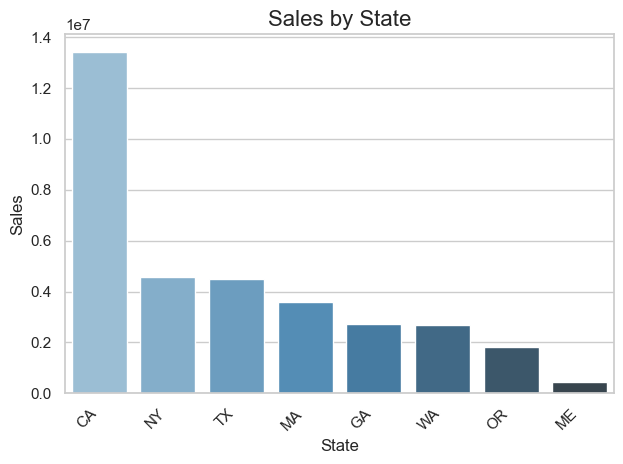

In [137]:
#Visualyzing the sales in each state.
sns.set_theme(style="whitegrid")
sns.barplot(x=sales_by_states.index, y=sales_by_states.values, palette="Blues_d")
plt.title('Sales by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [138]:
#Showing the percentage of sales held by each state.
sales_by_states_percent = (sales_by_states / total_sales) * 100
sales_by_states_percent = sales_by_states_percent.round(2)
sales_by_states_percent = sales_by_states_percent.sort_values(ascending=False)
sales_by_states_percent

cust_state
CA    39.77
NY    13.53
TX    13.36
MA    10.58
GA     8.07
WA     7.94
OR     5.42
ME     1.32
Name: total_sale, dtype: float64

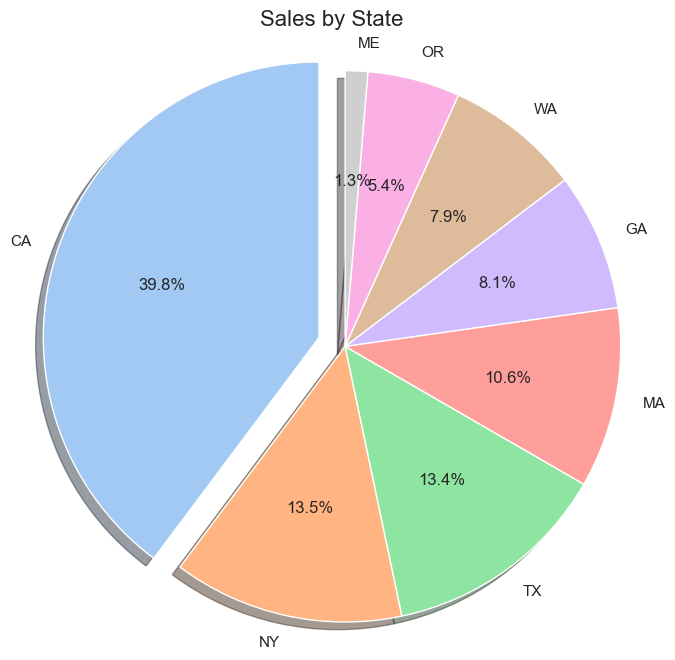

In [139]:
#Using a pie chart to show sales_by_state_percent.
explode = [0.1 if i == sales_by_states_percent.idxmax() else 0 for i in sales_by_states_percent.index]
colors = sns.color_palette('pastel')
sales_by_states_percent.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), explode=explode, colors=colors, shadow=True, startangle=90)
plt.title('Sales by State', fontsize=16)
plt.ylabel('')
plt.axis('equal')
plt.show()

In [140]:
#Grouping sales by age.
sales_by_age = df.groupby('cust_age')['total_sale'].sum().sort_values(ascending=False)
sales_by_age

cust_age
43    734433.73
37    724877.87
45    720814.30
39    715726.69
36    714944.06
        ...    
65    294925.66
69    292039.97
55    290948.00
80    290672.12
48    284132.01
Name: total_sale, Length: 72, dtype: float64

In [141]:
print(f"The age with the highest sales was 43 at $749,686.92")
print(f"The age with the lowest sales was 48 at $292,774.59")

The age with the highest sales was 43 at $749,686.92
The age with the lowest sales was 48 at $292,774.59


In [142]:
#Creating dataframe of age and total sales
age_sales = df[['cust_age', 'total_sale']]
age_sales.head()

,cust_age,total_sale
0,36,610.0
6,77,610.0
12,54,610.0
18,57,610.0
24,77,610.0


In [143]:
print(f"The yougest customer to make a purchase was {age_sales.cust_age.min()} years old.")
print(f"The oldest customer to make a purchase was {age_sales.cust_age.max()} years old.")

The yougest customer to make a purchase was 15 years old.
The oldest customer to make a purchase was 86 years old.


In [144]:
#Dividing into age groups
customer_15_25 = age_sales[age_sales['cust_age'].between(15, 25)]
customer_26_35 = age_sales[age_sales['cust_age'].between(26, 35)]
customer_36_45 = age_sales[age_sales['cust_age'].between(36, 45)]
customer_46_55 = age_sales[age_sales['cust_age'].between(46, 55)]
customer_56_65 = age_sales[age_sales['cust_age'].between(56, 65)]
customer_66_75 = age_sales[age_sales['cust_age'].between(66, 75)]
customer_76_86 = age_sales[age_sales['cust_age'].between(76, 86)]

In [145]:
#Making a list of each age groups sum.
age_sales_list = [customer_15_25['total_sale'].sum(), customer_26_35['total_sale'].sum(),
                  customer_36_45['total_sale'].sum(), customer_46_55['total_sale'].sum(),
                  customer_56_65['total_sale'].sum(), customer_66_75['total_sale'].sum(), customer_76_86['total_sale'].sum()]

In [146]:
#Turning the age_sales_list into a DataFrame
age_groups_df = pd.DataFrame({
    'Age Group': ['15-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-86'],
    'Total Sales': age_sales_list
})

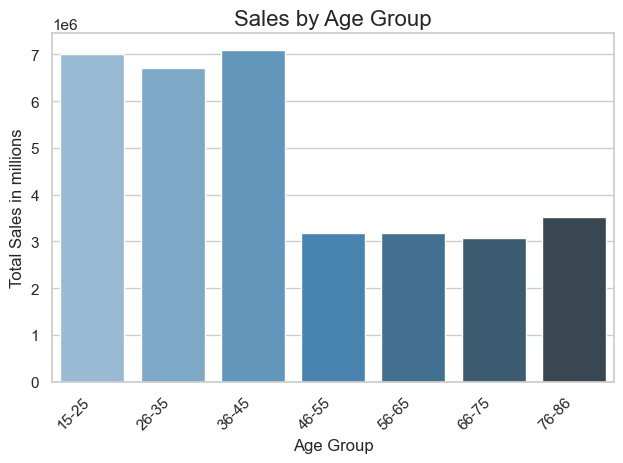

In [147]:
#Visualizing sales by age group.  Requirement 3 completed.
sns.set_theme(style="whitegrid")
sns.barplot(x='Age Group', y='Total Sales', data=age_groups_df, palette="Blues_d")
plt.title('Sales by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Sales in millions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [148]:
#Showing the top 10 products.
common_products = df['product_name'].value_counts().head(10)
common_products

product_name
Lightning Charging Cable      21269
USB-C Charging Cable          20780
AAA Batteries (4-pack)        20240
AA Batteries (4-pack)         20037
Wired Headphones              17798
Apple Airpods Headphones      15491
Bose SoundSport Headphones    12941
27in FHD Monitor               7315
27in 4K Gaming Monitor         6073
34in Ultrawide Monitor         5942
Name: count, dtype: int64

Created wordcloud which shows accessories such as charging cables and batteries as the most purchased products.

In [149]:
from wordcloud import WordCloud

In [150]:
#Creating a WordCloud
text = ' '.join(df['product_name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

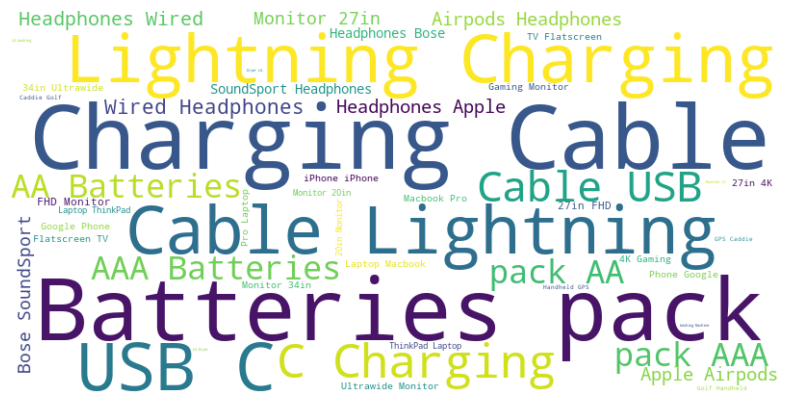

In [151]:
#Showing wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()